# Import Library

In [80]:
import pandas as pd
from PIL import Image
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import skimage
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Data Gathering

## Retrieve CSV Files

In [81]:
train_csv_path = "Dataset_Batik/train.csv"
test_csv_path = "Dataset_Batik/test.csv"

train_csv = pd.read_csv(train_csv_path)
test_csv = pd.read_csv(test_csv_path)

In [82]:
train_csv.head()

,id,filename,label
0,0,f4da1e77cfbd47e9bf8030e471e0cd58.jpg,Naga
1,1,2390f5dcc0054cbe9100c2a794ea56e2.jpg,Naga
2,2,05b348ac8db74e5ba184a0f51afffee2.jpg,Naga
3,3,5460d1892fab4afdb555d223582105b0.jpg,Naga
4,4,0310279f903845648cf14214f7fbcaf4.jpg,Naga


In [83]:
test_csv.head()

,id,filename
0,0,929c49c077f242cdb5f69f3638f2b59d.jpg
1,1,5d9cc1a8b7624015a0528228f15cedf7.jpg
2,2,1f57bb9f2d3948d49edc86dc3eabe62d.jpg
3,3,382f659a19a842ee9ca325dddad8e6a9.jpg
4,4,2cbe00a446314898bce069fdd162b477.jpg


## Retrieve Images Data

In [84]:
train_folder_path = "Dataset_Batik/data-batik-2025/train"
train_arr = []

for filename in os.listdir(train_folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
        train_img = os.path.join(train_folder_path, filename)
        try:
            with Image.open(train_img) as img:
                train_arr.append(img.copy())
        except Exception as e:
            print(f"Fail to open {filename}: {e}")
            


In [85]:
test_folder_path = "Dataset_Batik/data-batik-2025/test"
test_arr = []

for filename in os.listdir(test_folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
        test_img = os.path.join(test_folder_path, filename)
        try:
            with Image.open(test_img) as img:
                test_arr.append(img.copy())
        except Exception as e:
            print(f"Fail to open {filename}: {e}")
            


## Link Images with CSV

In [86]:
train_csv["image_path"] = train_csv["filename"].apply(lambda x: os.path.join(train_folder_path, x))

missing_train = train_csv[~train_csv["image_path"].apply(os.path.exists)]
if len(missing_train) > 0:
    print("\n Missing training image files:")
    print(missing_train)
else:
    print("\n All training image files found!")


 All training image files found!


In [87]:
train_csv.describe()

,id
count,1101.000000
mean,550.000000
std,317.975628
min,0.000000
25%,275.000000
50%,550.000000
75%,825.000000
max,1100.000000


In [88]:
test_csv["image_path"] = test_csv["filename"].apply(lambda x: os.path.join(test_folder_path, x))

missing_test = test_csv[~test_csv["image_path"].apply(os.path.exists)]
if len(missing_test) > 0:
    print("\n Missing testing image files:")
    print(missing_test)
else:
    print("\n All testing image files found!")


 All testing image files found!


In [89]:
test_csv.describe()

,id
count,741.000000
mean,370.000000
std,214.052564
min,0.000000
25%,185.000000
50%,370.000000
75%,555.000000
max,740.000000


In [90]:
train_df = train_csv.copy()
test_df = test_csv.copy()

In [91]:
print("Example of linkage for training:")
for i in range(3):
    row = train_df.iloc[i]
    print(f"ID: {row['id']}, File: {row['filename']}, Label: {row['label']}")
    print(" -> Image path:", row['image_path'])
    print()


print("Example of linkage for testing:")
for i in range(3):
    row = test_df.iloc[i]
    print(f"ID: {row['id']}, File: {row['filename']}")
    print(" -> Image path:", row['image_path'])
    print()


Example of linkage for training:
ID: 0, File: f4da1e77cfbd47e9bf8030e471e0cd58.jpg, Label: Naga
 -> Image path: Dataset_Batik/data-batik-2025/train\f4da1e77cfbd47e9bf8030e471e0cd58.jpg

ID: 1, File: 2390f5dcc0054cbe9100c2a794ea56e2.jpg, Label: Naga
 -> Image path: Dataset_Batik/data-batik-2025/train\2390f5dcc0054cbe9100c2a794ea56e2.jpg

ID: 2, File: 05b348ac8db74e5ba184a0f51afffee2.jpg, Label: Naga
 -> Image path: Dataset_Batik/data-batik-2025/train\05b348ac8db74e5ba184a0f51afffee2.jpg

Example of linkage for testing:
ID: 0, File: 929c49c077f242cdb5f69f3638f2b59d.jpg
 -> Image path: Dataset_Batik/data-batik-2025/test\929c49c077f242cdb5f69f3638f2b59d.jpg

ID: 1, File: 5d9cc1a8b7624015a0528228f15cedf7.jpg
 -> Image path: Dataset_Batik/data-batik-2025/test\5d9cc1a8b7624015a0528228f15cedf7.jpg

ID: 2, File: 1f57bb9f2d3948d49edc86dc3eabe62d.jpg
 -> Image path: Dataset_Batik/data-batik-2025/test\1f57bb9f2d3948d49edc86dc3eabe62d.jpg



## EDA

### Check Image Sample and Link

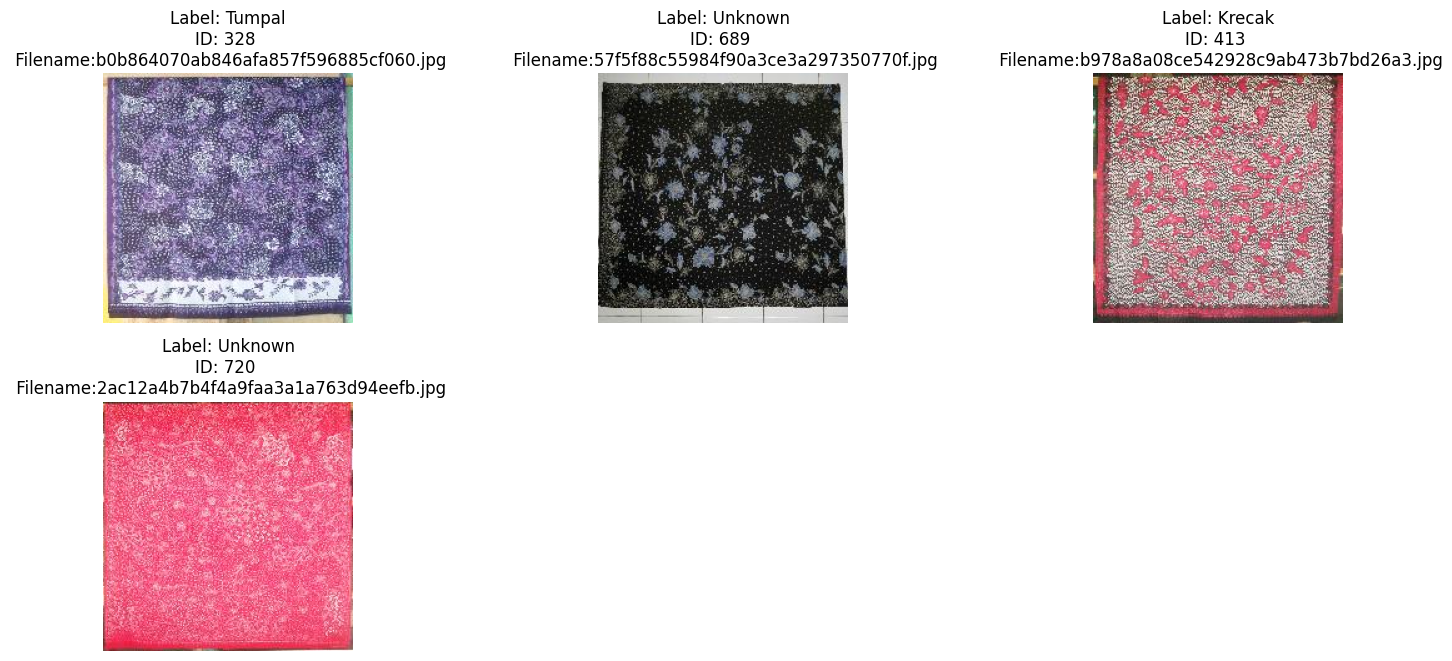

In [92]:
sample_df = train_df.sample(4, random_state=42)

plt.figure(figsize=(15, 10))

for i, (_, row) in enumerate(sample_df.iterrows()):
    img = mpimg.imread(row['image_path'])
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Label: {row['label']}\nID: {row['id']} \n Filename:{row['filename']}")
    plt.axis('off')

plt.tight_layout()
plt.show()

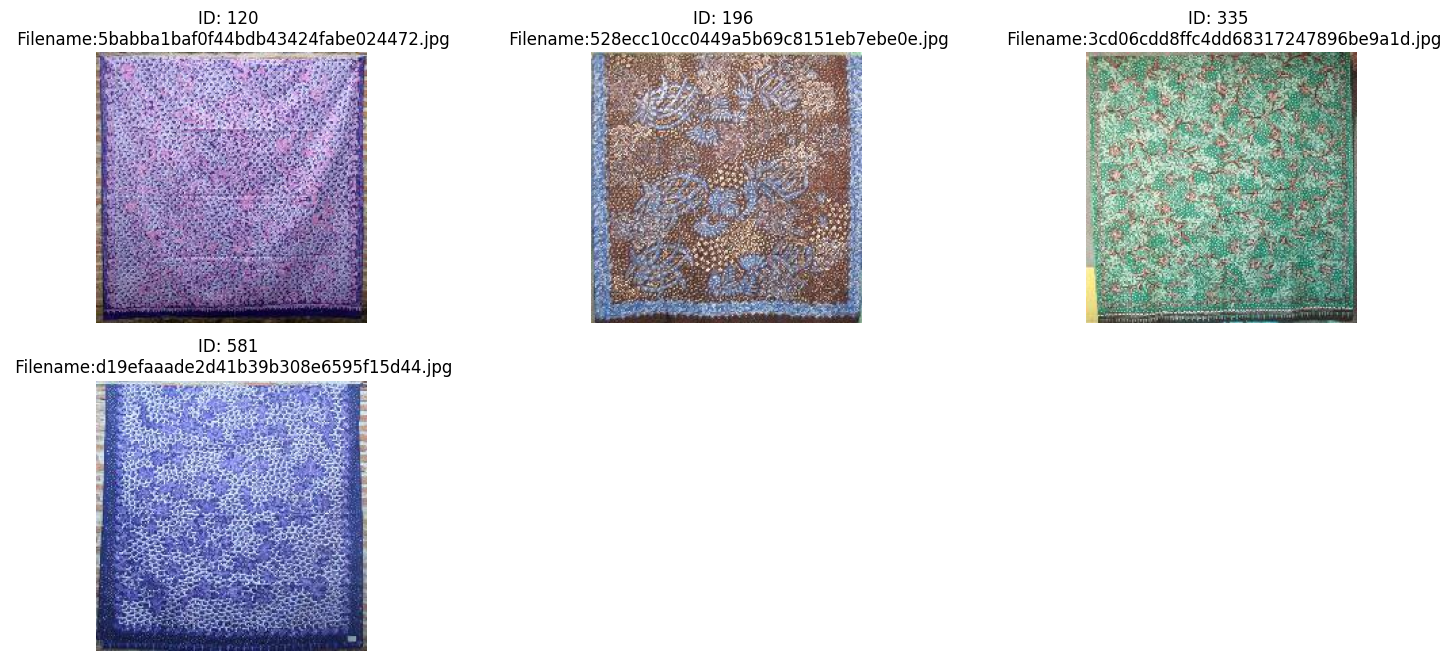

In [93]:
sample_test_df = test_df.sample(4, random_state=42)

plt.figure(figsize=(15, 10))

for i, (_, row) in enumerate(sample_test_df.iterrows()):
    img = mpimg.imread(row['image_path'])
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(f"ID: {row['id']} \n Filename:{row['filename']}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### Check Label

In [94]:
le = LabelEncoder()
train_df["label_encoded"] = le.fit_transform(train_df["label"])

label_counts = train_df["label_encoded"].nunique()

print(f"Jumlah label motif batik: {label_counts}")

print(f"Nama kelas yang ada: {le.classes_}")


Jumlah label motif batik: 12
Nama kelas yang ada: ['Aseman' 'Bledak' 'Gringsing' 'Gunung Ringgit' 'Kontemporer' 'Krecak'
 'Latohan' 'Naga' 'Sekar Jagat' 'Siang Malam' 'Tumpal' 'Unknown']


### Data Distribution

In [95]:
counts_label= train_df["label"].value_counts()

label_percent = (counts_label / len(train_df)) * 100
imbalance_ratio = counts_label.max() / counts_label.min()

summary_df = pd.DataFrame({
    'Label': counts_label.index,
    'Count': counts_label.values,
    'Percentage': label_percent.values.round(2)
})
print("🔹 Label Distribution:")
print(summary_df)
print(f"\n Imbalance Ratio (max/min): {imbalance_ratio:.2f}x difference")

🔹 Label Distribution:
             Label  Count  Percentage
0          Unknown    360       32.70
1          Latohan    318       28.88
2           Bledak    156       14.17
3           Aseman     85        7.72
4           Tumpal     78        7.08
5           Krecak     35        3.18
6      Kontemporer     25        2.27
7      Sekar Jagat     21        1.91
8   Gunung Ringgit     10        0.91
9             Naga      9        0.82
10     Siang Malam      3        0.27
11       Gringsing      1        0.09

 Imbalance Ratio (max/min): 360.00x difference


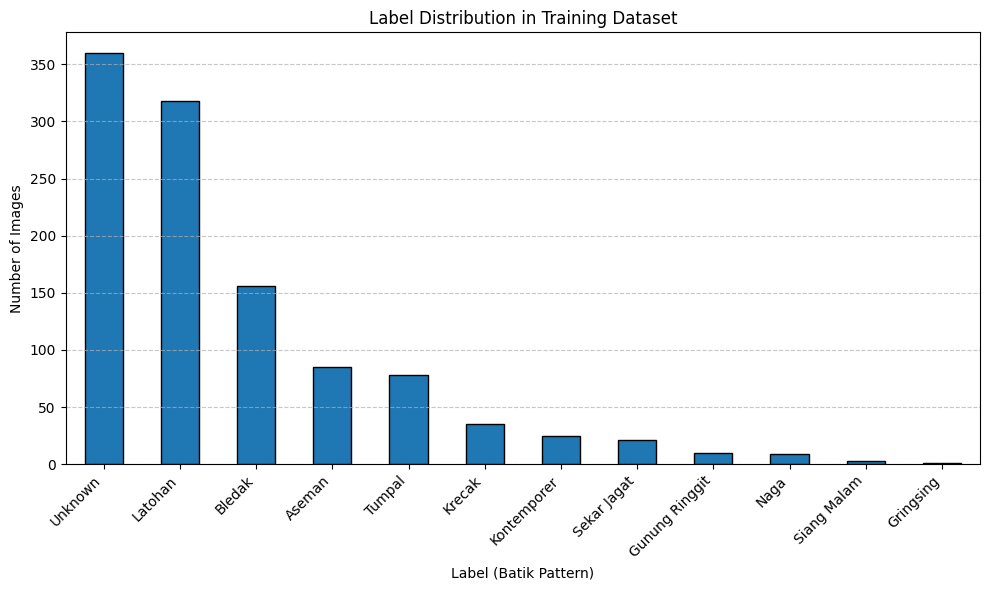

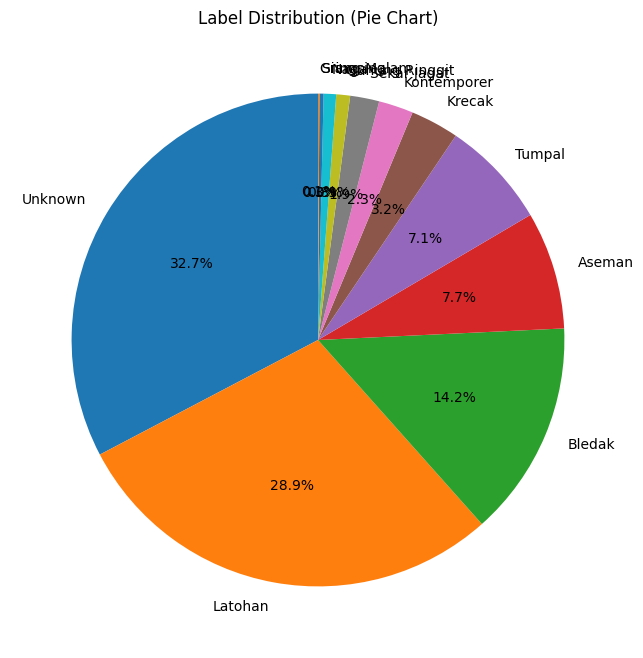

In [96]:
# BAR CHART
plt.figure(figsize=(10, 6))
counts_label.plot(kind='bar', color='#1f77b4', edgecolor='black')
plt.title('Label Distribution in Training Dataset')
plt.xlabel('Label (Batik Pattern)')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# PIE CHART
plt.figure(figsize=(8,8))
plt.pie(counts_label, labels=counts_label.index, autopct='%1.1f%%', startangle=90)
plt.title('Label Distribution (Pie Chart)')
plt.show()

In [97]:
counts = train_df['label'].value_counts()
buckets = {
    'very_tiny': counts[counts <= 5].index.tolist(),
    'small': counts[(counts > 5) & (counts <= 30)].index.tolist(),
    'medium': counts[(counts > 30) & (counts <= 100)].index.tolist(),
    'large': counts[counts > 100].index.tolist()
}
print({k: len(v) for k, v in buckets.items()})

{'very_tiny': 2, 'small': 4, 'medium': 3, 'large': 3}


# Data Splitting

In [98]:
IMG_SIZE = 224
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE
RANDOM_STATE = 42
SEED = 42

## Cek Minimum Sample

In [99]:
MIN_VALID_SAMPLE = 20

count_min_valid = counts_label[counts_label >= MIN_VALID_SAMPLE].index.tolist()
print(f"Label with more than {MIN_VALID_SAMPLE} samples: {count_min_valid}")

df_valable = train_df[train_df['label'].isin(count_min_valid)].reset_index(drop=True)

df_onlyTrain = train_df[~train_df['label'].isin(count_min_valid)].reset_index(drop=True)

print(f"Number of samples in training set: {len(train_df)}")
print(f"Number of samples in validation set: {len(df_valable)}")
print(f"Number of samples in test set: {len(test_df)}")

Label with more than 20 samples: ['Unknown', 'Latohan', 'Bledak', 'Aseman', 'Tumpal', 'Krecak', 'Kontemporer', 'Sekar Jagat']
Number of samples in training set: 1101
Number of samples in validation set: 1078
Number of samples in test set: 741


## Split (Only for Class that have more than 20 samples)

In [100]:
train_df_, val_df = train_test_split(
    df_valable,
    test_size=0.2,
    stratify=df_valable["label_encoded"],
    random_state=RANDOM_STATE
)

In [101]:
train_df_final = pd.concat([train_df_, df_onlyTrain], ignore_index=True).reset_index(drop=True)

print(f"Final Number of samples in training set: {len(train_df_final)}")
print(f"Final Number of samples in validation set: {len(val_df)}")
print(f"Final Number of samples in test set: {len(test_df)}")

Final Number of samples in training set: 885
Final Number of samples in validation set: 216
Final Number of samples in test set: 741


## Build Image Index

In [102]:
def load_image(path, label=None):
    # baca file
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    # resize
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    # normalisasi 0-1
    img = img / 255.0
    if label is None:
        return img
    return img, label

def build_dataset_index(df, base_dir, shuffle=True, batch_size=32):
    paths = [os.path.join(base_dir, str(fn)) for fn in df["filename"]]
    labels = df["label_encoded"].values
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(df), seed=SEED, reshuffle_each_iteration=True)
    ds = ds.map(lambda x, y: load_image(x, y),
                num_parallel_calls=tf.data.AUTOTUNE)
    ds = ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return ds

In [103]:
train_ds = build_dataset_index(train_df_final, base_dir=train_folder_path, shuffle=True, batch_size=BATCH_SIZE)
val_ds = build_dataset_index(val_df, base_dir=train_folder_path, shuffle=False, batch_size=BATCH_SIZE)

# Data Preprocessing

In [104]:
IMG_SIZE24 = (224, 224)

In [105]:
# Image Augmentation
strong_aug = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
], name="strong_aug"
)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.16524072..1.0058197].


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.12711184..1.0943116].


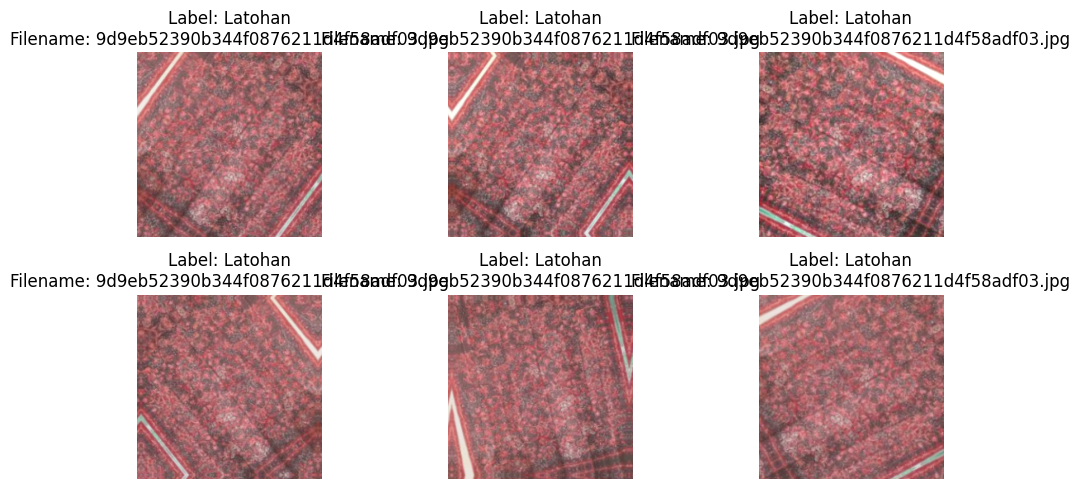

In [106]:
sample_df_row = train_df_final.sample(5).iloc[0]
sample_df_path = sample_df_row["image_path"]

img = tf.io.read_file(sample_df_path)
img = tf.image.decode_jpeg(img, channels=3)
img = tf.image.resize(img, IMG_SIZE24) / 255.0

plt.figure(figsize=(10, 5))

for i in range(6):
    test_aug = strong_aug(tf.expand_dims(img, 0), training=True)
    plt.subplot(2, 3, i + 1)
    plt.imshow(test_aug[0].numpy())
    plt.title(
        f"Label: {sample_df_row['label']}\n"
        f"Filename: {sample_df_row['filename']}"
    )
    plt.axis("off")

plt.tight_layout()
plt.show()

# Model Training

In [107]:
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import MobileNetV2, VGG16, ResNet50, EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [108]:
IMG_24 = 224
IMG_29 = 299
IMG_25 = 256

EPOCH_40 = 40
EPOCH_50 = 50 
EPOCH_100 = 100

BATCH_SIZE_32 = 32
BATCH_SIZE_16 = 16

## MobileNet

### Phase 1

In [109]:
# 1. Load pretrained model
# ==============================
mobilenet_base = MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)
mobilenet_base.trainable = False

In [110]:
# === BUILD MODEL ===
inputs = layers.Input(shape=(224, 224, 3))

# Apply augmentation
x = strong_aug(inputs)

# Forward through ptm backbone
x = mobilenet_base(x, training=False)

# === CUSTOM CNN HEAD (from the journal) ===
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(224, activation="relu")(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(label_counts, activation="softmax")(x)

model_mobile = models.Model(inputs, outputs, name="mobilenet-basic")

# === COMPILE ===
model_mobile.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model_mobile.summary()

Model: "mobilenet-basic"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 strong_aug (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_7   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_14 (Dense)            (None, 224)               286944    
                                                                 
 dropout_7 (Dropout)         (None, 224)           

In [111]:
history_mb1 = model_mobile.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCH_40,
    batch_size=BATCH_SIZE_32,
    callbacks=[
        EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
        ReduceLROnPlateau(factor=0.5, patience=2)
    ]
)

Epoch 1/40
28/28 [==============================] - 28s 569ms/step - loss: 2.2424 - accuracy: 0.2825 - val_loss: 1.7406 - val_accuracy: 0.4398 - lr: 1.0000e-04
Epoch 2/40
28/28 [==============================] - 15s 522ms/step - loss: 1.8119 - accuracy: 0.3876 - val_loss: 1.6648 - val_accuracy: 0.4537 - lr: 1.0000e-04
Epoch 3/40
28/28 [==============================] - 16s 569ms/step - loss: 1.7404 - accuracy: 0.4147 - val_loss: 1.6063 - val_accuracy: 0.4722 - lr: 1.0000e-04
Epoch 4/40
28/28 [==============================] - 15s 532ms/step - loss: 1.6351 - accuracy: 0.4497 - val_loss: 1.5715 - val_accuracy: 0.4676 - lr: 1.0000e-04
Epoch 5/40
28/28 [==============================] - 15s 533ms/step - loss: 1.5806 - accuracy: 0.4542 - val_loss: 1.5552 - val_accuracy: 0.4815 - lr: 1.0000e-04
Epoch 6/40
28/28 [==============================] - 15s 534ms/step - loss: 1.5483 - accuracy: 0.4972 - val_loss: 1.5306 - val_accuracy: 0.4954 - lr: 1.0000e-04
Epoch 7/40
28/28 [======================

### Phase 2

In [112]:
mobilenet_base.trainable = True

for layer in mobilenet_base.layers[:100]:  # freeze early layers
    layer.trainable = False
    

model_mobile.compile(
    optimizer=optimizers.SGD(learning_rate=1e-4, momentum=0.9),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [113]:
history_mb2 = model_mobile.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCH_50,
    batch_size=BATCH_SIZE_32,
    callbacks=[
        EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
        ReduceLROnPlateau(factor=0.5, patience=2)
    ]
)

Epoch 1/50
28/28 [==============================] - 24s 592ms/step - loss: 1.3593 - accuracy: 0.5412 - val_loss: 1.6830 - val_accuracy: 0.4028 - lr: 1.0000e-04
Epoch 2/50
28/28 [==============================] - 15s 531ms/step - loss: 1.5160 - accuracy: 0.4554 - val_loss: 1.4561 - val_accuracy: 0.4954 - lr: 1.0000e-04
Epoch 3/50
28/28 [==============================] - 15s 525ms/step - loss: 1.5123 - accuracy: 0.4701 - val_loss: 1.4808 - val_accuracy: 0.4861 - lr: 1.0000e-04
Epoch 4/50
28/28 [==============================] - 15s 542ms/step - loss: 1.4758 - accuracy: 0.4791 - val_loss: 1.4323 - val_accuracy: 0.5139 - lr: 1.0000e-04
Epoch 5/50
28/28 [==============================] - 16s 569ms/step - loss: 1.3494 - accuracy: 0.5040 - val_loss: 1.3607 - val_accuracy: 0.5278 - lr: 1.0000e-04
Epoch 6/50
28/28 [==============================] - 16s 583ms/step - loss: 1.4064 - accuracy: 0.5198 - val_loss: 1.3875 - val_accuracy: 0.5370 - lr: 1.0000e-04
Epoch 7/50
28/28 [======================

## EfficientNet

In [ ]:
phr,

In [114]:
effnet_base = EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)
effnet_base.trainable = False

In [115]:
inputs = layers.Input(shape=(224, 224, 3))
x = strong_aug(inputs)
x = effnet_base(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(label_counts, activation="softmax")(x)

model_effnet = models.Model(inputs, outputs, name="effnet-basic")

In [116]:
model_effnet.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model_effnet.summary()

Model: "effnet-basic"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 strong_aug (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 global_average_pooling2d_8   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_16 (Dense)            (None, 256)               327936    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                      

In [118]:
# history_e1 = model_effnet.fit(
#     train_ds,
#     validation_data=val_ds,
#     epochs=EPOCH_40,
#     batch_size=BATCH_SIZE_32,
#     callbacks=[
#         EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
#         ReduceLROnPlateau(factor=0.5, patience=2)
#     ]
# )

In [ ]:
# effnet_base.trainable = True

# for layer in effnet_base.layers[:200]:
#     layer.trainable = False

# model_effnet.compile(
#     optimizer=optimizers.Adam(learning_rate=1e-4),
#     loss="sparse_categorical_crossentropy",
#     metrics=["accuracy"]
# )

# history_e2 = model_effnet.fit(
#     train_ds,
#     validation_data=val_ds,
#     epochs=20,
#     callbacks=[
#         EarlyStopping(patience=5, restore_best_weights=True),
#         ReduceLROnPlateau(factor=0.5, patience=2)
#     ]
# )

Epoch 1/20
28/28 [==============================] - 30s 649ms/step - loss: 1.8308 - accuracy: 0.3220 - val_loss: 1.7215 - val_accuracy: 0.2963 - lr: 1.0000e-04
Epoch 2/20
28/28 [==============================] - 14s 506ms/step - loss: 1.8524 - accuracy: 0.2836 - val_loss: 1.7379 - val_accuracy: 0.3333 - lr: 1.0000e-04
Epoch 3/20
28/28 [==============================] - 18s 636ms/step - loss: 1.8725 - accuracy: 0.3141 - val_loss: 1.7296 - val_accuracy: 0.3333 - lr: 1.0000e-04
Epoch 4/20
28/28 [==============================] - 15s 530ms/step - loss: 1.8417 - accuracy: 0.2791 - val_loss: 1.7140 - val_accuracy: 0.3333 - lr: 5.0000e-05
Epoch 5/20
28/28 [==============================] - 16s 570ms/step - loss: 1.8359 - accuracy: 0.3130 - val_loss: 1.7236 - val_accuracy: 0.3333 - lr: 5.0000e-05
Epoch 6/20
28/28 [==============================] - 18s 630ms/step - loss: 1.8418 - accuracy: 0.2915 - val_loss: 1.7124 - val_accuracy: 0.3333 - lr: 5.0000e-05
Epoch 7/20
28/28 [======================

# Model Evaluation

In [119]:
def build_test_dataset(df, base_dir, batch_size=32):
    paths = [os.path.join(base_dir, str(fn)) for fn in df["filename"]]

    # make dataset ONLY from image paths
    ds = tf.data.Dataset.from_tensor_slices(paths)

    ds = ds.map(lambda x: load_image(x, label=None),
                num_parallel_calls=tf.data.AUTOTUNE)

    ds = ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

    return ds

In [120]:
test_ds = build_test_dataset(test_df, base_dir=test_folder_path, batch_size=BATCH_SIZE_32)
print(test_ds)

<PrefetchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>


In [122]:
pred_mb_arr = []

for batch_imgs in test_ds:
    preds_mb = model_effnet.predict(batch_imgs, verbose=0)
    preds_cls = np.argmax(preds_mb, axis=1)
    pred_mb_arr.extend(preds_cls)

pred_mb_arr = np.array(pred_mb_arr)

predicted_label_mb = le.inverse_transform(pred_mb_arr)

submission_df = pd.DataFrame({
    "id": test_df["id"],
    "label": predicted_label_mb
})

submission_df.to_csv("submission_mb.csv", index=False)
print("Submission saved to submission_mb.csv")


Submission saved to submission_mb.csv


## Plotting Graph

## Saving Predictions in CSV File